# Emotion Dataset Processing

This notebook processes dataset:
* **[Emotion](https://www.kaggle.com/datasets/marcospenelas/emotion)**
    - **License**: MIT
    ```
    Released under MIT License

    Copyright (c) 2013 Mark Otto.
    
    Copyright (c) 2017 Andrew Fong.
    
    Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
    
    The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
    
    THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
    ```


---

## Goal
Preprocessing emotion dataset, distributed into six classes:
- **0**: Sadness
- **1**: Joy
- **2**: Love
- **3**: Anger
- **4**: Fear
- **5**: Surprise

*The obtained data is imbalanced in terms of the number of records per class. To address this during model training, class weighting should be considered.*

---

## Table of Contents

1. [Imports](#imports)
2. [Emotion preprocessing](#emotion)
3. [Cleaning dataset](#cleaning-dataset)
4. [Distribution of values in the 'label' column](#distribution-of-values-in-the-label-column)
5. [Saving to file](#saving-to-file)

# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Emotion

Preprocessing the dataset.

In [2]:
dataset = pd.read_csv('emotion.csv')

In [3]:
dataset.head()

,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [7]:
dataset.duplicated().sum()

np.int64(686)

In [8]:
dataset[dataset.duplicated()]

,text,label
5163,i feel more adventurous willing to take risks,1
12826,i feel so honored and proud,1
21699,i feel broke inside but i won t admit,0
23231,i feel jubilation over how i met your mother e...,1
26320,i feel depressed,0
...,...,...
415355,i feel hated helping prevent gay teen suicide ...,3
415373,i feel delicious height px id header headerimg...,1
415411,i feel as though i m being punished for something,0
415735,i feel so blessed to be a part of it,1


In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
dataset['label'].unique()

array([0, 1, 2, 3, 4, 5])

# Cleaning dataset

Minimal text cleaning. Contemporary algorithms can leverage elements such as punctuation, spelling, and text structure as additional context to enhance analysis.

* Remove links
* Remove mentions 
* Preserve characters and punctuation
* Get rid of whitespaces
* Save hashtags (can be used as context)

In [11]:
import re


def clean_text(text):
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^A-Za-z0-9\s.,!?]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [12]:
dataset['text'] = dataset['text'].apply(clean_text)

Removing very short texts

Texts that are 1-2 chars length can be noise and do not contribute to better model training.

In [13]:
dataset = dataset[dataset['text'].str.len() > 3]

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 416120 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416120 non-null  object
 1   label   416120 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.5+ MB


In [15]:
dataset.isnull().sum()

text     0
label    0
dtype: int64

In [16]:
dataset.duplicated().sum()

np.int64(0)

In [17]:
dataset = dataset.reset_index(drop=True)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416120 entries, 0 to 416119
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416120 non-null  object
 1   label   416120 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.3+ MB


# Distribution of values in the 'label' column

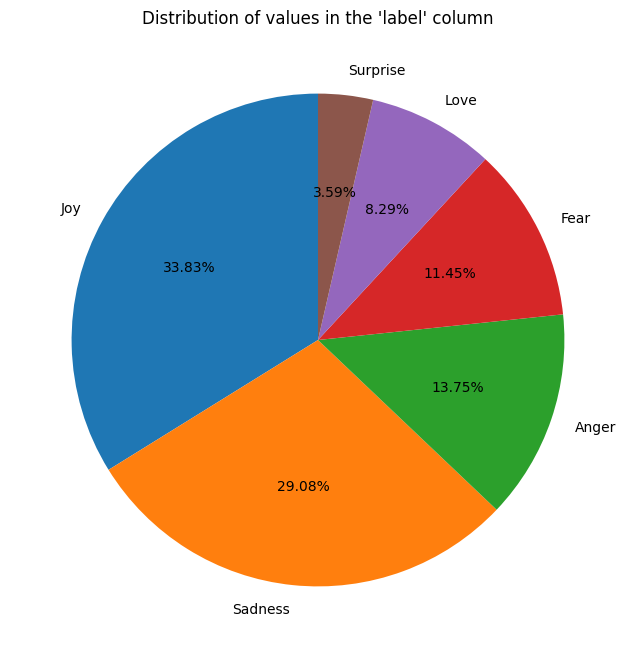

In [19]:
label_counts = dataset['label'].value_counts()
labels = label_counts.index
sizes = label_counts.values

labels_mapping = {0: 'Sadness', 1: 'Joy', 2: 'Love', 3: 'Anger', 4: 'Fear', 5: 'Surprise'}

labels = [labels_mapping[label] for label in labels]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90)
plt.title("Distribution of values in the 'label' column")
plt.show()

# Saving to file

In [20]:
dataset.to_csv(
    'emotion_dataset.csv',
    index=False,
    sep=',',
    encoding='utf-8'
)

dataset.to_parquet(
    'emotion_dataset.parquet',
    index=False,
)